In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.2 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, BatchNorm
import torch
from torch_geometric.data import Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch.nn as nn
from sklearn.preprocessing import LabelEncoder
from torch_geometric.utils import from_networkx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Nhóm 3/Bài tập trên lớp/Báo cáo tiến trình/Project/feature_extraction.csv')

# Chọn các node là features

In [ ]:
# def build_initial_graph(W, feature_names):
#     G = nx.Graph()
#     num_features = len(feature_names)
#     for i, name in enumerate(feature_names):
#         G.add_node(i, label=name)
#     for i in range(num_features):
#         for j in range(i + 1, num_features):
#             if W[i, j] > 0:
#                 G.add_edge(i, j, weight=W[i, j])
#     return G

In [ ]:
# # Chọn cột làm features
# df = df[['dtbhk_truoc', 'drltl', 'sotchk', 'namhoc', 'xeploai']]
# feature_columns = ['namhoc', 'drltl', 'sotchk', 'dtbhk_truoc']
# features = df[feature_columns]

# # Chuẩn hóa features
# scaler = StandardScaler()
# node_features = scaler.fit_transform(features)

# standardized_features = pd.DataFrame(
#        node_features, columns=feature_columns
#     )
# correlation_matrix = np.corrcoef(standardized_features.T)


In [ ]:
# G = build_initial_graph(correlation_matrix, feature_columns)


In [ ]:
# # Chuyển đổi đồ thị NetworkX sang PyTorch Geometric
# data = from_networkx(G)

# # Nếu cần thêm node features
# node_features = torch.tensor(correlation_matrix, dtype=torch.float)  # Ma trận đặc trưng của nút
# data.x = node_features

# # Nếu có nhãn (labels) cho các nút
# labels = df['xeploai']
# data.y = torch.tensor(labels, dtype=torch.long)  # Thay labels bằng danh sách nhãn thực tế

In [ ]:

# class GCNModel(nn.Module):
#     def __init__(self, input_dim, hidden_dim, output_dim):
#         super(GCNModel, self).__init__()
#         self.conv1 = GCNConv(input_dim, hidden_dim)
#         self.conv2 = GCNConv(hidden_dim, output_dim)

#     def forward(self, data):
#         x, edge_index = data.x, data.edge_index
#         x = self.conv1(x, edge_index)
#         x = F.relu(x)
#         x = self.conv2(x, edge_index)
#         return F.log_softmax(x, dim=1)

# # Khởi tạo mô hình
# model = GCNModel(input_dim=data.x.shape[1], hidden_dim=16, output_dim=len(torch.unique(data.y)))

# # Huấn luyện mô hình
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# def train():
#     model.train()
#     optimizer.zero_grad()
#     out = model(data)
#     loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
#     loss.backward()
#     optimizer.step()
#     return loss.item()


# Chọn các node là các dòng dữ liệu

In [ ]:
# Chọn cột làm features

df = df[['dtbhk_truoc', 'drltl', 'sotchk', 'namhoc', 'xeploai']]
feature_columns = ['namhoc', 'drltl', 'sotchk', 'dtbhk_truoc']
features = df[feature_columns]


# Chuẩn hóa features

scaler = StandardScaler()

node_features = scaler.fit_transform(features)

In [ ]:
#Tạo danh sách liên kết dựa trên KNN: nối các nodes gần nhau nhất về mặt khoảng cách euclide
# Tạo ma trận adjacency bằng KNN
adjacency_matrix = kneighbors_graph(node_features, n_neighbors=5, mode='connectivity')
edges = adjacency_matrix.nonzero()
edge_list = list(zip(edges[0], edges[1]))

edge_list

[(0, 9708),
 (0, 10484),
 (0, 12032),
 (0, 4405),
 (0, 6738),
 (1, 22645),
 (1, 8787),
 (1, 14006),
 (1, 29238),
 (1, 20185),
 (2, 30035),
 (2, 14521),
 (2, 8685),
 (2, 293),
 (2, 17110),
 (3, 6268),
 (3, 6673),
 (3, 26407),
 (3, 410),
 (3, 8285),
 (4, 31906),
 (4, 6721),
 (4, 23182),
 (4, 15663),
 (4, 3494),
 (5, 30763),
 (5, 6579),
 (5, 23994),
 (5, 16890),
 (5, 10348),
 (6, 13591),
 (6, 30888),
 (6, 7915),
 (6, 7252),
 (6, 13798),
 (7, 9597),
 (7, 21080),
 (7, 8430),
 (7, 7082),
 (7, 34298),
 (8, 33488),
 (8, 25282),
 (8, 24776),
 (8, 5562),
 (8, 29760),
 (9, 18366),
 (9, 17487),
 (9, 7431),
 (9, 13569),
 (9, 5184),
 (10, 11567),
 (10, 31656),
 (10, 34353),
 (10, 4064),
 (10, 24957),
 (11, 34119),
 (11, 30573),
 (11, 6472),
 (11, 14452),
 (11, 33761),
 (12, 614),
 (12, 3133),
 (12, 25900),
 (12, 32802),
 (12, 23051),
 (13, 6036),
 (13, 14757),
 (13, 26455),
 (13, 12209),
 (13, 2373),
 (14, 22203),
 (14, 26575),
 (14, 3611),
 (14, 32657),
 (14, 5636),
 (15, 25520),
 (15, 9056),
 (15,

In [ ]:

# Chuyển đổi sang tensor
x = torch.tensor(node_features, dtype=torch.float)
edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()

# Tạo đối tượng Graph
data = Data(x=x, edge_index=edge_index)



In [ ]:
labels = torch.tensor(df['xeploai'].values, dtype=torch.long)

# Chia các chỉ số nút thành tập train, val, test
train_idx, test_idx = train_test_split(range(len(labels)), test_size=0.2, random_state=42)
val_idx, test_idx = train_test_split(test_idx, test_size=0.5, random_state=42)

# Tạo mask cho các tập
train_mask = torch.zeros(len(labels), dtype=torch.bool)
train_mask[train_idx] = True
val_mask = torch.zeros(len(labels), dtype=torch.bool)
val_mask[val_idx] = True
test_mask = torch.zeros(len(labels), dtype=torch.bool)
test_mask[test_idx] = True

# Thêm vào graph object
data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask
data.y = labels

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x


# class GCN(torch.nn.Module):
#     def __init__(self, in_channels, hidden_channels, out_channels):
#         super(GCN, self).__init__()
#         self.conv1 = GCNConv(in_channels, hidden_channels)
#         self.bn1 = BatchNorm(hidden_channels)
#         self.conv2 = GCNConv(hidden_channels, hidden_channels)
#         self.bn2 = BatchNorm(hidden_channels)
#         self.conv3 = GCNConv(hidden_channels, out_channels)

#     def forward(self, data):
#         x, edge_index = data.x, data.edge_index
#         x = self.conv1(x, edge_index)
#         x = self.bn1(x)
#         x = F.relu(x)
#         x = self.conv2(x, edge_index)
#         x = self.bn2(x)
#         x = F.relu(x)
#         x = self.conv3(x, edge_index)
#         return x

In [ ]:
model = GCN(in_channels=data.x.shape[1], hidden_channels=16, out_channels=len(labels.unique()))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-3)
criterion = nn.CrossEntropyLoss()

In [ ]:
print(model)

GCN(
  (conv1): GCNConv(4, 16)
  (conv2): GCNConv(16, 5)
)


Trực quan hóa trước khi train

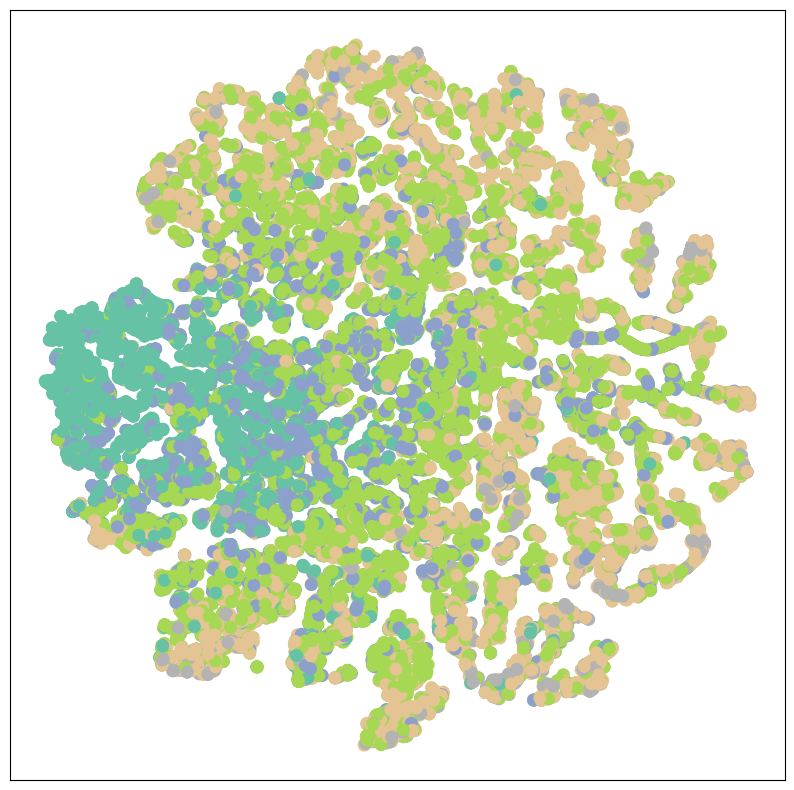

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

model.eval()
out = model(data)
visualize(out, color=data.y)


In [ ]:
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)  # Forward pass
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Loss trên tập train
    loss.backward()  # Backward pass
    optimizer.step()  # Update weights
    return loss.item()


In [ ]:
@torch.no_grad()
def evaluate(mask):
    model.eval()
    out = model(data)
    pred = out[mask].argmax(dim=1)  # Lấy dự đoán
    acc = (pred == data.y[mask]).sum().item() / mask.sum().item()
    return acc


In [ ]:
for epoch in range(200):
    loss = train()
    train_acc = evaluate(data.train_mask)
    val_acc = evaluate(data.val_mask)
    print(f"Epoch {epoch+1}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


Epoch 1, Loss: 1.9446, Train Acc: 0.1425, Val Acc: 0.1378
Epoch 2, Loss: 1.8630, Train Acc: 0.1557, Val Acc: 0.1509
Epoch 3, Loss: 1.7882, Train Acc: 0.2022, Val Acc: 0.1992
Epoch 4, Loss: 1.7199, Train Acc: 0.2501, Val Acc: 0.2435
Epoch 5, Loss: 1.6577, Train Acc: 0.2908, Val Acc: 0.2789
Epoch 6, Loss: 1.6010, Train Acc: 0.3276, Val Acc: 0.3110
Epoch 7, Loss: 1.5497, Train Acc: 0.3566, Val Acc: 0.3417
Epoch 8, Loss: 1.5032, Train Acc: 0.3838, Val Acc: 0.3741
Epoch 9, Loss: 1.4613, Train Acc: 0.4092, Val Acc: 0.3983
Epoch 10, Loss: 1.4235, Train Acc: 0.4312, Val Acc: 0.4162
Epoch 11, Loss: 1.3894, Train Acc: 0.4533, Val Acc: 0.4351
Epoch 12, Loss: 1.3588, Train Acc: 0.4716, Val Acc: 0.4530
Epoch 13, Loss: 1.3313, Train Acc: 0.4832, Val Acc: 0.4642
Epoch 14, Loss: 1.3066, Train Acc: 0.4952, Val Acc: 0.4762
Epoch 15, Loss: 1.2843, Train Acc: 0.5049, Val Acc: 0.4856
Epoch 16, Loss: 1.2643, Train Acc: 0.5130, Val Acc: 0.4932
Epoch 17, Loss: 1.2461, Train Acc: 0.5188, Val Acc: 0.4999
Epoch 

In [ ]:
test_acc = evaluate(data.test_mask)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.5869


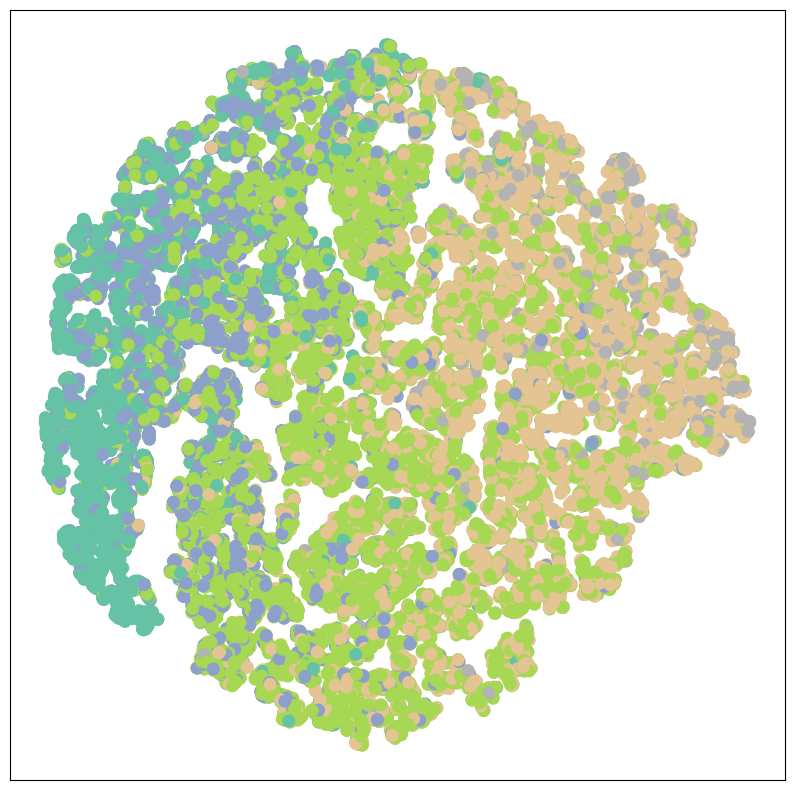

In [ ]:
model.eval()
out = model(data)
visualize(out, color=data.y)


In [ ]:
@torch.no_grad()
def predict_single(data, index):
    model.eval()  # Đặt mô hình ở chế độ đánh giá
    out = model(data)  # Dự đoán toàn bộ tập dữ liệu
    pred = out.argmax(dim=1)  # Lấy nhãn dự đoán (class với giá trị xác suất cao nhất)

    # Lấy thông tin của dòng test
    feature_values = data.x[index].cpu().numpy()
    predicted_label = pred[index].item()
    true_label = data.y[index].item()

    return feature_values, predicted_label, true_label


In [ ]:
# Lấy chỉ số của các dòng trong tập test
test_indices = torch.where(data.test_mask)[0]

# Chọn dòng test đầu tiên
test_index = test_indices[0].item()

# Thực hiện dự đoán
features, predicted_label, true_label = predict_single(data, test_index)

# In kết quả
print("Dòng dữ liệu test:")
print("Features:", features)
print(f"Dự đoán: {predicted_label}, Thực tế: {true_label}")


Dòng dữ liệu test:
Features: [ 0.18193512  0.99852127 -0.56310916  0.9508972 ]
Dự đoán: 3, Thực tế: 3


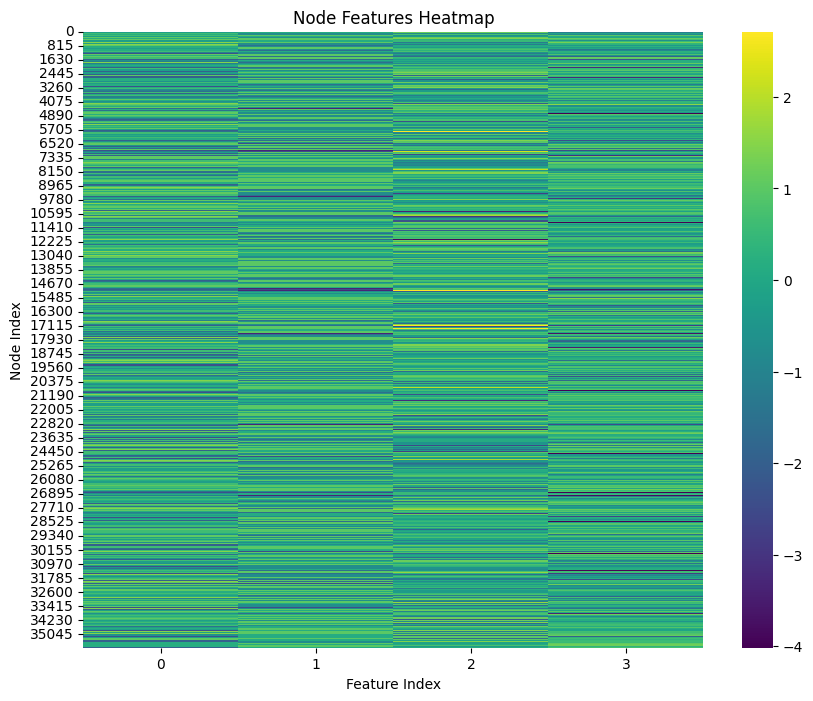

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_heatmap(features, title="Heatmap of Node Features"):
    plt.figure(figsize=(10, 8))
    sns.heatmap(features, cmap="viridis", annot=False)
    plt.title(title)
    plt.xlabel("Feature Index")
    plt.ylabel("Node Index")
    plt.show()

# Vẽ heatmap của đặc trưng các nút
plot_feature_heatmap(data.x.numpy(), title="Node Features Heatmap")


In [ ]:
import networkx as nx

def visualize_graph(edge_index, labels, title="Graph Visualization"):
    G = nx.Graph()
    edges = edge_index.t().tolist()
    G.add_edges_from(edges)

    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, seed=42)  # Bố trí các nút đồ thị
    nx.draw(
        G, pos, with_labels=True, node_color=labels.numpy(), cmap="Set2",
        node_size=500, font_size=10, font_color="white"
    )
    plt.title(title)
    plt.show()

# Vẽ đồ thị
visualize_graph(data.edge_index, data.y, title="Graph with Node Labels")


In [ ]:
from sklearn.manifold import TSNE

def plot_tsne(embeddings, labels, title="TSNE Visualization"):
    z = TSNE(n_components=2, random_state=42).fit_transform(embeddings)
    plt.figure(figsize=(10, 8))
    plt.scatter(z[:, 0], z[:, 1], c=labels.numpy(), cmap="Set2", s=70)
    plt.title(title)
    plt.colorbar()
    plt.show()

# Trực quan hóa TSNE trước huấn luyện
model.eval()
with torch.no_grad():
    out = model(data)
plot_tsne(out.numpy(), data.y, title="TSNE after Training")
